In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import cmocean as cm
import glob
import os
import xarray as xr
import datetime
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls, wind_tools
import pickle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from sys import platform

%matplotlib inline

In [15]:
## User inputs.  As set up now, darwin -> paths on Rachael's "shuga" laptop 
## The other paths are for Vicky's Ocean setup

if platform == 'darwin':
    bathy_dir = '/Users/rmueller/Data/SalishSeaCast/grid/'
    results_dir = '/Users/rmueller/Projects/'
    out_dir = '/Users/rmueller/Documents/Presentations/2020/OceanSciences2020/'
else:
    display('Update file paths for oceans machine')
    
# Set to [1] if you want to print to file and [0] if not
print_to_file = 0  

In [16]:
## colourmap for the land/water. 
vmax = 1
cmap2 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'lightskyblue'), #change this if you want a different colour for water
                                                    (0.85 / vmax, 'lightskyblue'), #change this if you want a different colour for water
                                                    (0.850001 / vmax, 'papayawhip'), #change this if you want a different colour for land
                                                    (1 / vmax, 'papayawhip')] #change this if you want a different colour for land
                                        )

### Compare 2D concentrations for early beaching case of 01 Aug, 2017, with more delayed beaching case of 15 Jan, 2018

In [22]:
#aug01_17 = nc.Dataset(results_dir + 'MIDOSS/results/OS2020/bunkerc/SB/Lagrangian_BunkerC_crude_SB_01aug17-08aug17_BunkerC.nc')
#jan15_18 = nc.Dataset(results_dir + 'MIDOSS/results/OS2020/bunkerc/SB/Lagrangian_BunkerC_crude_SB_15jan18-22jan18_BunkerC.nc')

aug01_17 = xr.open_dataset(results_dir + 'MIDOSS/results/OS2020/bunkerc/SB/Lagrangian_BunkerC_crude_SB_01aug17-08aug17_BunkerC.nc')
jan15_18 = xr.open_dataset(results_dir + 'MIDOSS/results/OS2020/bunkerc/SB/Lagrangian_BunkerC_crude_SB_15jan18-22jan18_BunkerC.nc')

In [24]:
aug01_17_thick = aug01_17.Thickness_2D
aug01_17_thick_t = aug01_17_thick.sum(dim='time')
jan15_18_thick = jan15_18.Thickness_2D
jan15_18_thick_t = jan15_18_thick.sum(dim='time')

### plot up 2D thickness

Text(0.5,1,'Jan 15, 2018')

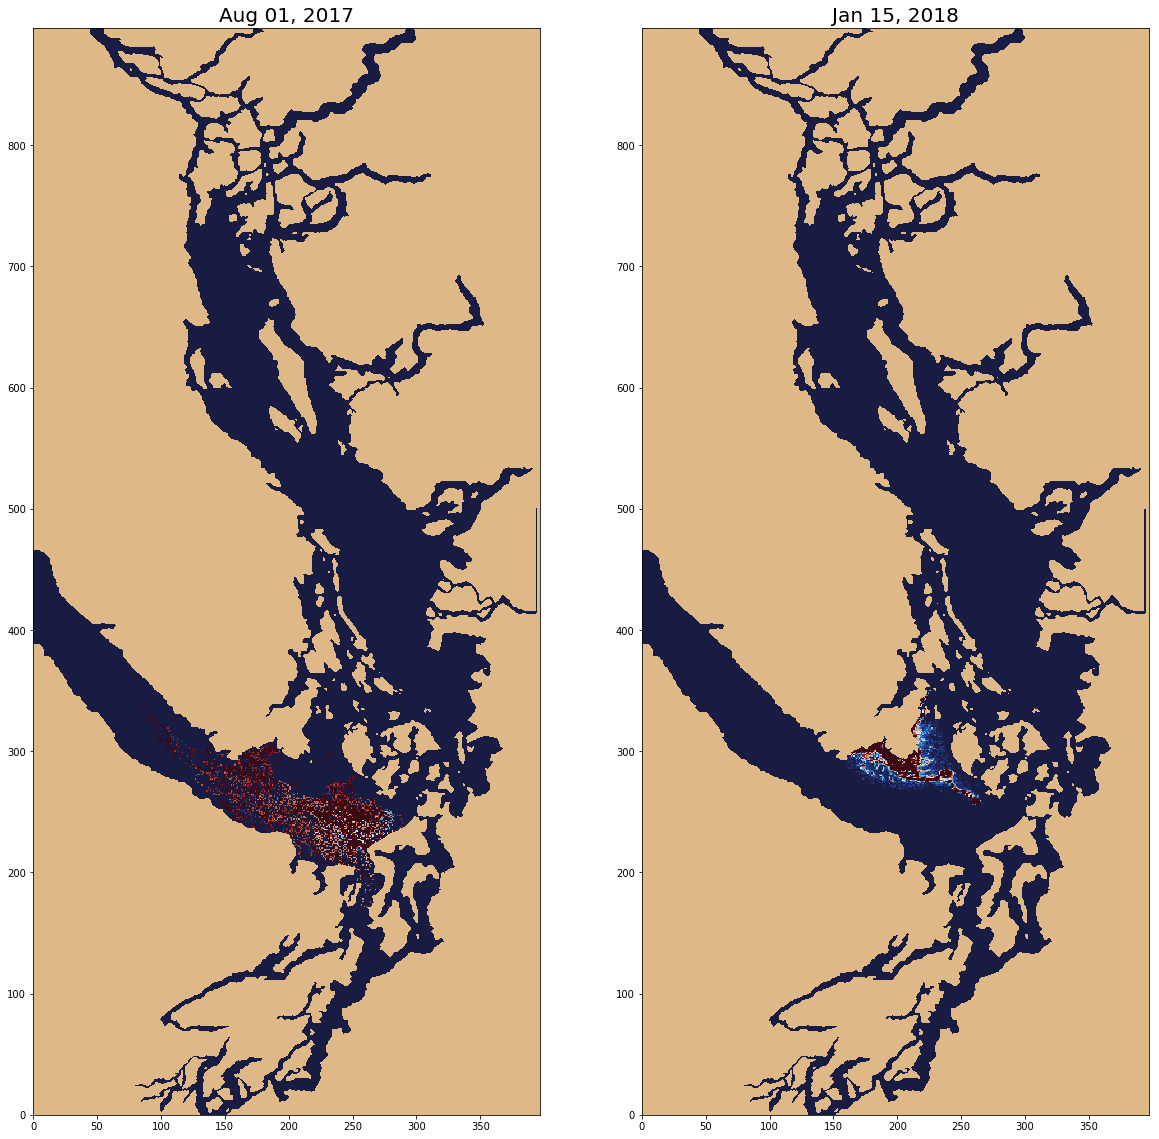

In [27]:
fs = 20
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# convert xarray into numpy using ".values" in order to gain access to different visualization tools
mappable = ax1.pcolormesh(aug01_17_thick_t.values, vmin = 0, vmax = 40, cmap = cm.cm.balance)
mappable = ax2.pcolormesh(jan15_18_thick_t.values, vmin = 0, vmax = 40, cmap = cm.cm.balance)

# add land mask to ax1 and ax2
viz_tools.plot_land_mask(ax1,'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
viz_tools.plot_land_mask(ax2,'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')

ax1.set_title('Aug 01, 2017', fontsize = fs)
ax2.set_title('Jan 15, 2018', fontsize = fs)


### plot up spill area comparison

In [18]:
#### Load header information

with open('/Users/rmueller/Projects/MIDOSS/results/OS2020/bunkerc/SB/resOilOutput_01aug2017.sro', 'r') as the_file:
    all_data = [line.strip() for line in the_file.readlines()]
    header = all_data[4]  
    
# Order header into list array by splitting up string
header_arr = []
header_arr = header.split(' ')
# Remove emtpy entries from list
header_arr = np.asarray([x for x in header_arr if x != ''])
header_arr

array(['Seconds', 'YY', 'MM', 'DD', 'hh', 'mm', 'ss', 'MassOil',
       'VolOilBeached', 'VolumeBeached', 'VolumeOil', 'Volume', 'Area',
       'TeoricalArea', 'Thickness', 'MEvaporated', 'VEvaporated',
       'FMEvaporated', 'MDispersed', 'VDispersed', 'FMDispersed',
       'MSedimented', 'VSedimented', 'FMSedimented', 'MDissolved',
       'VDissolved', 'FMDissolved', 'MChemDisp', 'VChemDisp', 'FMChemDisp',
       'MOilRecovered', 'VOilRecovered', 'FMOilRecovered', 'MWaterContent',
       'VWaterContent', 'Density', 'Viscosity', 'MBio', 'VBio', 'FMBio',
       'CharacteristicDiameter', 'P_Star', 'AnalyteMass1', 'AnalyteMass2',
       'AnalyteMass3', 'AnalyteMass4', 'AnalyteMass5', 'AnalyteBio1',
       'AnalyteBio2', 'AnalyteBio3', 'AnalyteBio4', 'AnalyteBio5'],
      dtype='<U22')

In [19]:
# load mass balance area values
aug01_17_sro_in = '/Users/rmueller/Projects/MIDOSS/results/OS2020/bunkerc/SB/resOilOutput_01aug2017.sro'
jan15_18_sro_in = '/Users/rmueller/Projects/MIDOSS/results/OS2020/bunkerc/SB/resOilOutput_15jan2018.sro'
data_aug01_17 = np.genfromtxt(aug01_17_sro_in, skip_header=6, skip_footer=4)
data_jan15_18 = np.genfromtxt(jan15_18_sro_in, skip_header=6, skip_footer=4)
data_aug01_17.shape

(191, 52)

In [20]:
data_jan15_18.shape

(129, 52)

Text(0.5,1,'Dispersed Mass Balance Comparison')

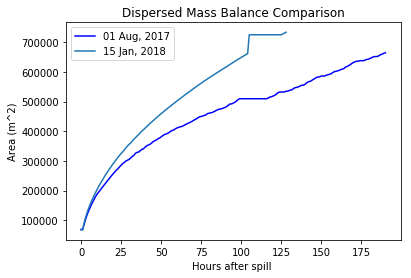

In [29]:
plot_data = 12
plt.plot(data_aug01_17[range(191),12],'b')
plt.plot(data_jan15_18[range(129),12])
plt.ylabel('Area (m^2)')
plt.xlabel('Hours after spill ')
plt.legend(['01 Aug, 2017', '15 Jan, 2018'])
plt.title('Dispersed Mass Balance Comparison')